# Projeto 3

Aluno: Pedro Augusto Ramalho Duarte

Matrícula: 17/0163717

Github: https://github.com/PedroAugustoRamalhoDuarte/fsi/blob/main/projeto3/Projeto3.ipynb
### Referências


- https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
- https://www.immersivelimit.com/tutorials/yolact-with-google-colab
- https://www.immersivelimit.com/tutorials/train-yolact-with-a-custom-coco-dataset
- https://www.kaggle.com/datasets/usmanafzaal/strawberry-disease-detection-dataset?select=Test+Disease+Severity+Level

In [1]:
# Download libs (Pillow needs to be restarted)
!pip install Pillow==9.0.0
!pip install torchvision==0.5.0
!pip install torch==1.4.0
!pip install labelme2coco

  Using cached torchvision-0.5.0-cp37-cp37m-manylinux1_x86_64.whl (4.0 MB)
     |████████████████████████████████| 753.4 MB 6.8 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.4.0 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.4.0 which is incompatible.
     |████████████████████████████████| 79 kB 3.7 MB/s 
     |████████████████████████████████| 97 kB 6.0 MB/s 
     |██████████████████████████

# Yolact

Para utilizar o yolact no projeto foi feito um fork e a adição de algumas configurações extras na pasta data/config.py que podem ser observadas nesse commit: https://github.com/PedroAugustoRamalhoDuarte/yolact/commit/053f6eb5f2cf16cef1b81b0359f2d5e112913935

In [6]:
# Make sure we're in the top folder
%cd /content

# Clone the repo
!git clone https://github.com/PedroAugustoRamalhoDuarte/yolact

/content
Cloning into 'yolact'...
remote: Enumerating objects: 2956, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 2956 (delta 8), reused 15 (delta 7), pack-reused 2939
Receiving objects: 100% (2956/2956), 111.99 MiB | 29.84 MiB/s, done.
Resolving deltas: 100% (2011/2011), done.


In [7]:
# Change to the right directory
%cd /content/yolact/external/DCNv2

# Build DCNv2
!python setup.py build develop

/content/yolact/external/DCNv2
running build
running build_ext
building '_ext' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/content
creating build/temp.linux-x86_64-3.7/content/yolact
creating build/temp.linux-x86_64-3.7/content/yolact/external
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src/cpu
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src/cuda
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-dIfpci/python3.7-3.7.13=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-dIfpci/python3.7-3.7.13=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -DWITH_CUDA -I/content/yolact/exte

In [11]:
# Make sure we're in the top folder
%cd /content

# Clone the repo
!git clone https://github.com/chentinghao/download_google_drive.git

# Create a new directory for the pre-trained weights
!mkdir -p /content/yolact/weights

# Download the file (Unused weights)
!python ./download_google_drive/download_gdrive.py 1ZPu1YR2UzGHQD0o1rEqy-j5bmEm3lbyP ./yolact/weights/yolact_plus_resnet50_54_800000.pth

/content
fatal: destination path 'download_google_drive' already exists and is not an empty directory.
32.0kB [00:00, 43.1MB/s]


In [28]:
# Configure Kaggle for download dataset (É necessário inserir o kaggle.json na pasta content)
# Tutorial: https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 385, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/comm

In [13]:
# Load dataset
!kaggle datasets download -d usmanafzaal/strawberry-disease-detection-dataset --force
!unzip strawberry-disease-detection-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/angular_leafspot351.jpg  
  inflating: test/angular_leafspot351.json  
  inflating: test/angular_leafspot352.jpg  
  inflating: test/angular_leafspot352.json  
  inflating: test/angular_leafspot353.jpg  
  inflating: test/angular_leafspot353.json  
  inflating: test/angular_leafspot354.jpg  
  inflating: test/angular_leafspot354.json  
  inflating: test/angular_leafspot355.jpg  
  inflating: test/angular_leafspot355.json  
  inflating: test/angular_leafspot357.jpg  
  inflating: test/angular_leafspot357.json  
  inflating: test/angular_leafspot358.jpg  
  inflating: test/angular_leafspot358.json  
  inflating: test/angular_leafspot359.jpg  
  inflating: test/angular_leafspot359.json  
  inflating: test/angular_leafspot360.jpg  
  inflating: test/angular_leafspot360.json  
  inflating: test/angular_leafspot362.jpg  
  inflating: test/angular_leafspot362.json  
  inflating: test/angular_leafspot363.jpg  
  inflating: te

In [14]:
import labelme2coco
split_rate = 1
labelme2coco.convert('train', 'annotations/train', split_rate)
labelme2coco.convert('val', 'annotations/val', split_rate)

There are 1450 listed files in folder train.


Converting labelme annotations to COCO format: 100%|██████████| 1450/1450 [00:02<00:00, 718.59it/s]
04/25/2022 22:05:46 - INFO - labelme2coco -   Converted annotations in COCO format is exported to annotations/train/dataset.json


There are 307 listed files in folder val.


Converting labelme annotations to COCO format: 100%|██████████| 307/307 [00:00<00:00, 810.82it/s]
04/25/2022 22:05:47 - INFO - labelme2coco -   Converted annotations in COCO format is exported to annotations/val/dataset.json


In [15]:
%cd /content/yolact
!python train.py --config=yolact_project3_strawberry_config

/content/yolact
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Initializing weights...
Begin training!

/content/yolact/utils/augmentations.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mode = random.choice(self.sample_options)
/content/yolact/utils/augmentations.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mode = random.choice(self.sample_options)
/content/yolact/utils/augmentations.py:309: VisibleDeprecationWarning

# Testando uma imagem aleatória

Config not specified. Parsed yolact_project3_strawberry_config from the file name.

Loading model... Done.


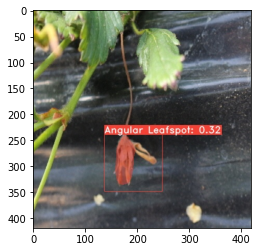

In [31]:
!python eval.py --trained_model=/content/yolact/weights/yolact_project3_strawberry_4_786_interrupt.pth --score_threshold=0.18 --top_k=15 --image=/content/test/gray_mold485.jpg:../img.jpg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../img.jpg')
imgplot = plt.imshow(img)
plt.show()

# Resultado da peformance por classe
O resultado não foi bom devido a dificuldade do dataset e do pouco treinamento aplicado para resolução do problema

In [27]:
!python eval.py --trained_model=/content/yolact/weights/yolact_project3_strawberry_4_786_interrupt.pth

Config not specified. Parsed yolact_project3_strawberry_config from the file name.

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading model... Done.

Processing Images  ██████████████████████████████    307 /    307 (100.00%)     6.53 fps        
Saving data...
Calculating mAP...
#################### Class: Powdery Mildew Leaf ####################

       |  all  |  .50  |  .55  |  .60  |  .65  |  .70  |  .75  |  .80  |  .85  |  .90  |  .95  |
-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
   box |  0.00 |  0.01 |  0.01 |  0.00 |  0.00 |  0.00 |  0.00 |  0.00 |  0.00 |  0.00 |  0.00 |
  mask |  0.01 |  0.02 |  0.01 |  0.01 |  0.01 |  0.00 |  0.00 |  0.00 |  0.00 |  0.00 |  0.00 |
-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+

#################### Class: Leaf Spot ####################

       |  all  |  .50  |  .55  |  .60  |  .65  |  .70  |  .75 

# Sugestões de Melhorias
- A principal melhoria seria utilizar um transfer learning rede já treinanda para algum caso semelhante ao do problema apresentado.
- Também seria interessante deixar o treinamento rodar por mais epochs, mas por problemas de tempo e recursos não foi possível
- Ampliação do banco de dados de imagens e/ou rotação das imagens já existentes